In [13]:
# Name : Dimpal Lad
# CWID : 20023001
# Assignment No : 06
# Assignment Name : HW06_RF

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [15]:
#Reading the data in dataframe and remove any missing values
#Remove any row with a missing value in any of the columns.
filename='C:/Users/dimpa/OneDrive - stevens.edu/CS-513/HW_04_NB/breast-cancer-wisconsin.csv'
nan_values=['?']
att_type={' Sample': 'str', 'Class':'category'}

df=pd.read_csv(filename,dtype=att_type,na_values=nan_values)

print(df[df.isna().any(axis=1)])

print(df.shape)
print(df.isnull().sum())
print()
df.dropna(inplace=True)
df['F6'] = df['F6'].astype('int64')

print(f"shape : {df.shape}")
print(df.isnull().sum())

      Sample  F1  F2  F3  F4  F5  F6  F7  F8  F9 Class
23   1057013   8   4   5   1   2 NaN   7   3   1     4
40   1096800   6   6   6   9   6 NaN   7   8   1     2
139  1183246   1   1   1   1   1 NaN   2   1   1     2
145  1184840   1   1   3   1   2 NaN   2   1   1     2
158  1193683   1   1   2   1   3 NaN   1   1   1     2
164  1197510   5   1   1   1   2 NaN   3   1   1     2
235  1241232   3   1   4   1   2 NaN   3   1   1     2
249   169356   3   1   1   1   2 NaN   3   1   1     2
275   432809   3   1   3   1   2 NaN   2   1   1     2
292   563649   8   8   8   1   2 NaN   6  10   1     4
294   606140   1   1   1   1   2 NaN   2   1   1     2
297    61634   5   4   3   1   2 NaN   2   3   1     2
315   704168   4   6   5   6   7 NaN   4   9   1     2
321   733639   3   1   1   1   2 NaN   3   1   1     2
411  1238464   1   1   1   1   1 NaN   2   1   1     2
617  1057067   1   1   1   1   1 NaN   1   1   1     2
(699, 11)
Sample     0
F1         0
F2         0
F3         0
F4 

In [16]:
df_num= df.select_dtypes(exclude='object')
df_obj= df.select_dtypes(include='object')
df_num.info()
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Sample  683 non-null    int64   
 1   F1      683 non-null    int64   
 2   F2      683 non-null    int64   
 3   F3      683 non-null    int64   
 4   F4      683 non-null    int64   
 5   F5      683 non-null    int64   
 6   F6      683 non-null    int64   
 7   F7      683 non-null    int64   
 8   F8      683 non-null    int64   
 9   F9      683 non-null    int64   
 10  Class   683 non-null    category
dtypes: category(1), int64(10)
memory usage: 59.4 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Empty DataFrame


In [17]:
attr = df.drop(columns = ['Class'])  # features
target = df['Class']  # target variable
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(attr, target, test_size=0.3, random_state=7)

In [18]:
#Importing Random Forest Classifier model from Sklearn library
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,random_state=9)

In [19]:
#Fitting the RF model
model.fit(X_train,Y_train)
target_pred = model.predict(X_test)

In [20]:
#Getting Classification report and confusion matrix using sklearn_metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(f"Accuracy= {accuracy_score(Y_test,target_pred)}")
cm = confusion_matrix(Y_test,target_pred)
print(cm)
print(classification_report(Y_test,target_pred))

Accuracy= 0.975609756097561
[[127   4]
 [  1  73]]
              precision    recall  f1-score   support

           2       0.99      0.97      0.98       131
           4       0.95      0.99      0.97        74

    accuracy                           0.98       205
   macro avg       0.97      0.98      0.97       205
weighted avg       0.98      0.98      0.98       205



[Text(0, 0.5, '2'), Text(0, 1.5, '4')]

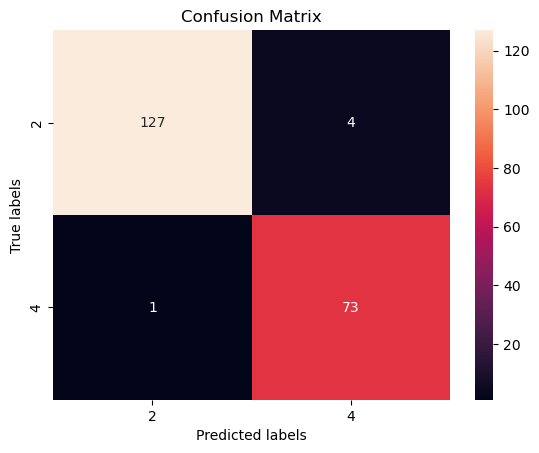

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt     
#Create confusion matrix heatmap with seaborn plot
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['2', '4'])
ax.yaxis.set_ticklabels(['2', '4'])

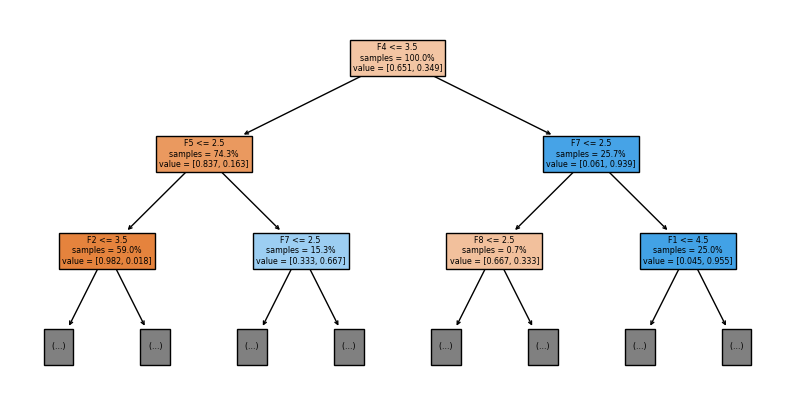

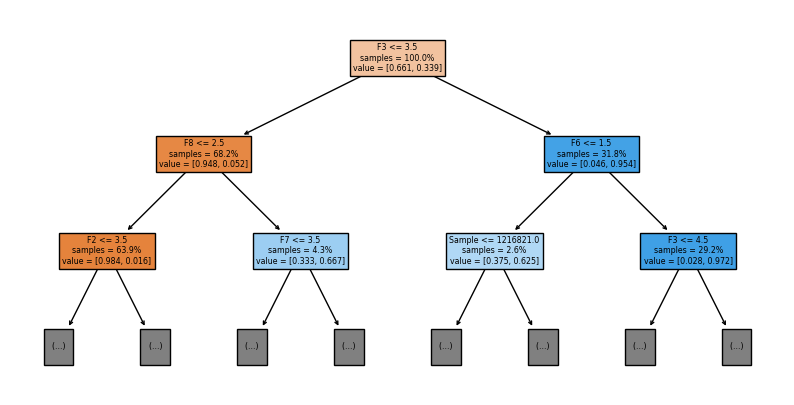

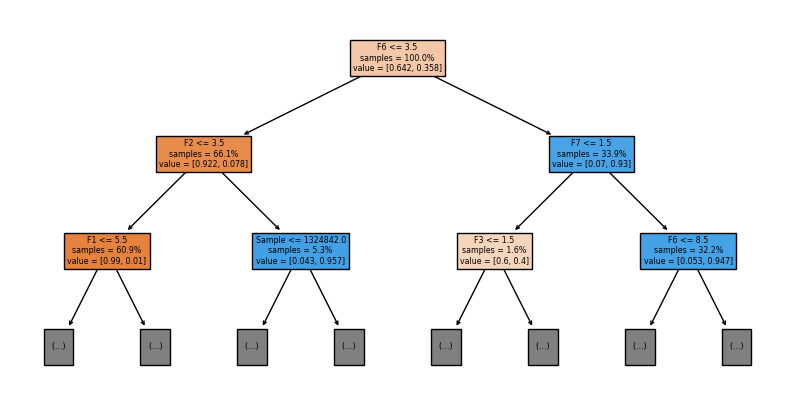

In [21]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
feature_names=list(attr_train.columns)
# From the forest exported the first three decision trees 
for i in range(3):
    tree = model.estimators_[i]
    plt.figure(figsize=(10, 5))
    plot_tree(tree, 
              feature_names=feature_names,  
              filled=True,  
              max_depth=2, 
              impurity=False, 
              proportion=True)
    plt.show()

In [22]:
# Feature importance for Mean Decrease Accuracy
mean_decrease_accuracy = model.feature_importances_
print(f"Mean Decrease Accuracy{ mean_decrease_accuracy}")
# # Feature importance for Mean Decrease GINI
# # Note: GINI importance is specific to decision trees and random forests
gini_importance = model.feature_importances_ * model.estimators_[0].tree_.impurity[0]
print(f"\nMean Decrease GINI= {gini_importance}")

Mean Decrease Accuracy[0.01771102 0.04093466 0.19400842 0.21274061 0.04390166 0.09560338
 0.20207029 0.11017479 0.07364527 0.0092099 ]

Mean Decrease GINI= [0.00805183 0.01860982 0.08820062 0.0967167  0.01995869 0.04346346
 0.09186573 0.05008795 0.03348081 0.00418703]


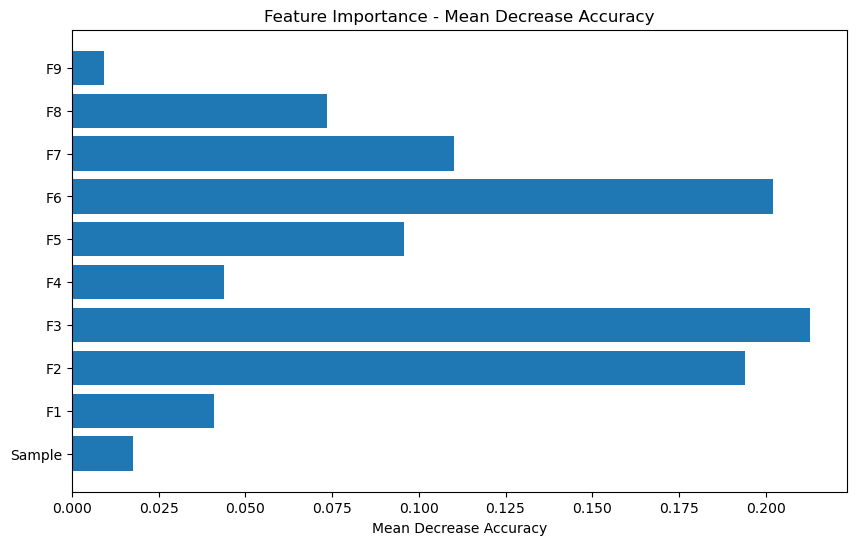

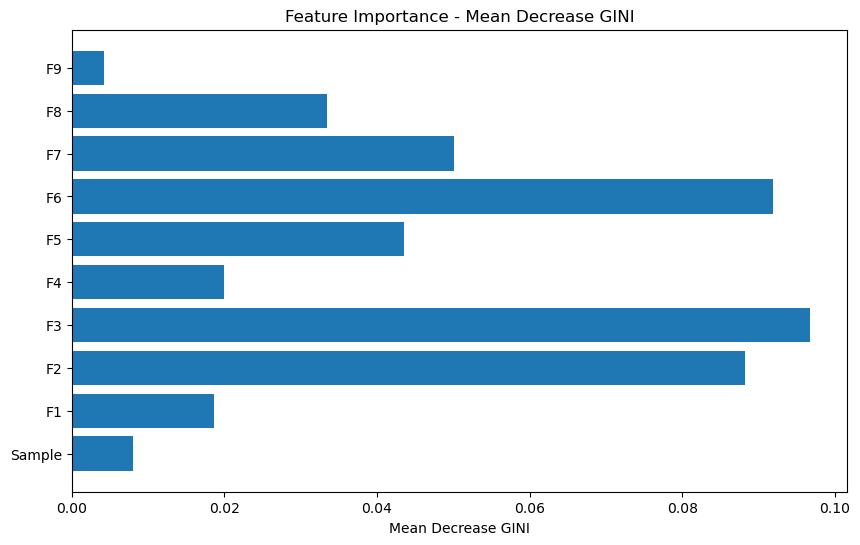

In [23]:
#Plotting the graph for feature importance -Mean Decrease Accuracy
plt.figure(figsize=(10, 6))
plt.barh(range(len(mean_decrease_accuracy)), mean_decrease_accuracy, align='center')
plt.yticks(range(len(mean_decrease_accuracy)), attr.columns)
plt.xlabel('Mean Decrease Accuracy')
plt.title('Feature Importance - Mean Decrease Accuracy')
plt.show()
plt.figure(figsize=(10, 6))
plt.barh(range(len(gini_importance)), gini_importance, align='center')
plt.yticks(range(len(gini_importance)), attr.columns)
plt.xlabel('Mean Decrease GINI')
plt.title('Feature Importance - Mean Decrease GINI')
plt.show()

In [12]:
#extracting feature importance score
feature_scores = pd.Series(model.feature_importances_, index=attr_train.columns).sort_values(ascending=False)

print(feature_scores)

F3        0.212741
F6        0.202070
F2        0.194008
F7        0.110175
F5        0.095603
F8        0.073645
F4        0.043902
F1        0.040935
Sample    0.017711
F9        0.009210
dtype: float64
